In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def plot_all_metrics(observed_eval_metrics_array, dataset_name=None, loss_labels=None, model_labels=None, split_labels=None, metric_labels=None):
    # Extract dimensions
    num_losses, num_models, num_splits, num_metrics = observed_eval_metrics_array.shape
    
    num_not_losses = num_metrics - num_losses
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_splits, num_metrics, figsize=(num_metrics * 1.7, num_splits * 1.7))
    fig.suptitle(dataset_name if dataset_name else "")
    
    # Define labels
    loss_labels = [f'Loss {i+1}' for i in range(num_losses)] if loss_labels is None else loss_labels
    model_labels = [f'Model {i+1}' for i in range(num_models)] if model_labels is None else model_labels
    split_labels = [f'Split {i+1}' for i in range(num_splits)] if split_labels is None else split_labels
    metric_labels = [f'Metric {i+1}' for i in range(num_metrics)] if metric_labels is None else metric_labels
    
    # Colors for different models and losses
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    # Iterate through the array and plot the metrics
    handles, labels = [], []
    y_limits = [0, 0]  # To store the max y-limits for the top and bottom rows of the last columns
    
    for k in range(num_splits):
        for m in range(num_metrics):
            ax = axes[k, m]
            width = 0.2
            
            for j in range(num_models):
                for i in range(num_losses):
                    metric = observed_eval_metrics_array[i, j, k, m]
                    
                    label = f'{loss_labels[i]}' if j == num_models - 1 else None #only label once
                    
                    color = colors[i]
                    
                    is_loss_in_question = (m == i)
                    
                    alpha = 0.4 if (m < num_losses and not is_loss_in_question) else 0.9
                    placement = width*(num_losses + 0.5)*j + i * width + width/4
                    
                    # Highlight specific bars
                    edgecolor = 'black' if is_loss_in_question else 'none'
                    linewidth = 2 if is_loss_in_question else 0
                    
                    bar = ax.bar(placement, metric, width, color=color, alpha=alpha, label=label, edgecolor=edgecolor, linewidth=linewidth)
                    
                    if label and label not in labels and m == num_metrics - 1:
                        handles.append(bar)
                        labels.append(label)
            
            # Add a black line between Model 1 and Model 2
            if num_models > 1:
                separation_position = width * (num_losses + 0.5)
                ax.axvline(separation_position - width / 2, color='black', linewidth=.5, linestyle='--')
            
            if k == num_splits - 1: #in bottom row, put model labels on x axis
                # Model labels
                ax.set_xticks([width*(num_losses + 0.5)*j + width*(num_losses - 1)/2 for j in range(num_models)])
                ax.set_xticklabels(model_labels)
            else: #in any other row, remove x axis
                ax.set_xticks([])
                
            if k == 0: #in top row, put metric labels in title
                ax.set_title(metric_labels[m])
                
            if m == 0: #in first column or third-to-last column, write train/test labels
                ax.set_ylabel(split_labels[k])
            elif m > num_losses: #in all other columns, hide y-axis
                ax.yaxis.set_visible(False) 
            
            # Show only the bottom and left spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(True if m <= num_losses else False)
            ax.spines['bottom'].set_visible(True)
            
            # Set specific y-axis ticks
            if m >= num_losses:
                ax.set_yticks([0, 0.5, 1])
            else:
                pass
            
            
    
    # Set the same y-limits for the top and bottom rows of the last columns
    for m in range(num_losses):
        
        ylims_this_column = [axes[k, m].get_ylim() for k in range(num_splits)]
        smallest_y = min([y[0] for y in ylims_this_column])
        biggest_y = max([y[1] for y in ylims_this_column])
        
        
        for k in range(num_splits):
            axes[k, m].set_ylim(smallest_y, biggest_y)
    
    # Add legend underneath the plot
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=num_losses, frameon=False)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 0.96])
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    
    fig.canvas.draw()
    
    fig.savefig(f'test.png')


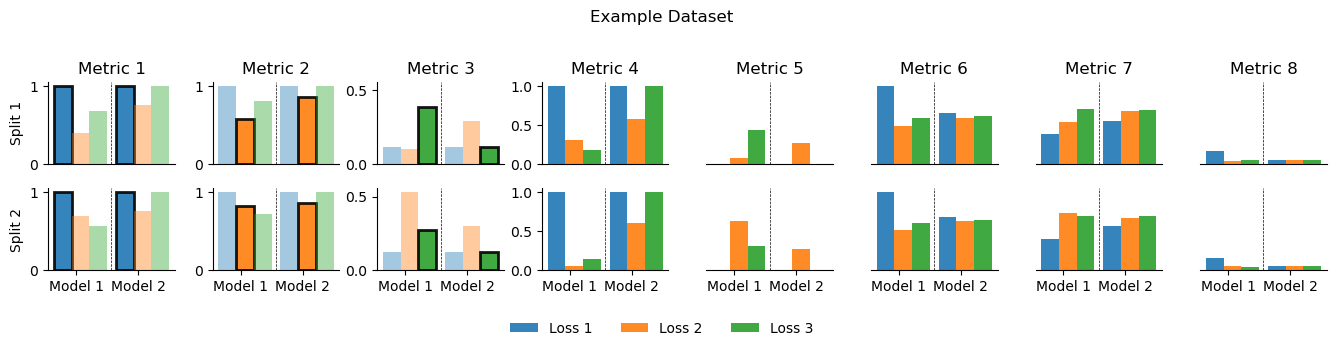

In [21]:
observed_eval_metrics_array = np.array(
    [[[[1.        , 0.99998581, 0.11190337, 1.        , 0.        , 2.03114057,
         0.36888912, 0.15060939],
        [1.        , 0.9999699 , 0.12276375, 1.        , 0.        , 1.90216386,
         0.38571218, 0.14929347]],

       [[1.        , 0.99998581, 0.11168098, 1.        , 0.        , 1.31479967,
         0.52575094, 0.04872298],
        [1.        , 0.9999699 , 0.12276375, 1.        , 0.        , 1.2909137 ,
         0.53670424, 0.05126932]]],


      [[[0.3996138 , 0.57102937, 0.10261703, 0.31010574, 0.07651645, 0.97507507,
         0.50404632, 0.03088657],
        [0.69663727, 0.82119298, 0.53064013, 0.05885714, 0.59666324, 0.98520052,
         0.69628876, 0.04696701]],

       [[0.75352192, 0.85943425, 0.29198831, 0.57268202, 0.25667268, 1.193205  ,
         0.64851594, 0.04483589],
        [0.75386369, 0.85965139, 0.29803443, 0.60367703, 0.2552616 , 1.19600844,
         0.64007735, 0.04651575]]],


      [[[0.6755476 , 0.80635768, 0.38517243, 0.17056853, 0.41210806, 1.18444061,
         0.67131758, 0.0428738 ],
        [0.57026935, 0.72632611, 0.27698952, 0.14988112, 0.29477751, 1.16394055,
         0.66584766, 0.04322407]],

       [[1.        , 0.99998581, 0.1117875 , 1.        , 0.        , 1.23274946,
         0.66247946, 0.0444921 ],
        [1.        , 0.9999699 , 0.12276375, 1.        , 0.        , 1.21756411,
         0.66334087, 0.04590938]]]]
)

# Example usage with the loaded array
plot_all_metrics(observed_eval_metrics_array, dataset_name="Example Dataset")

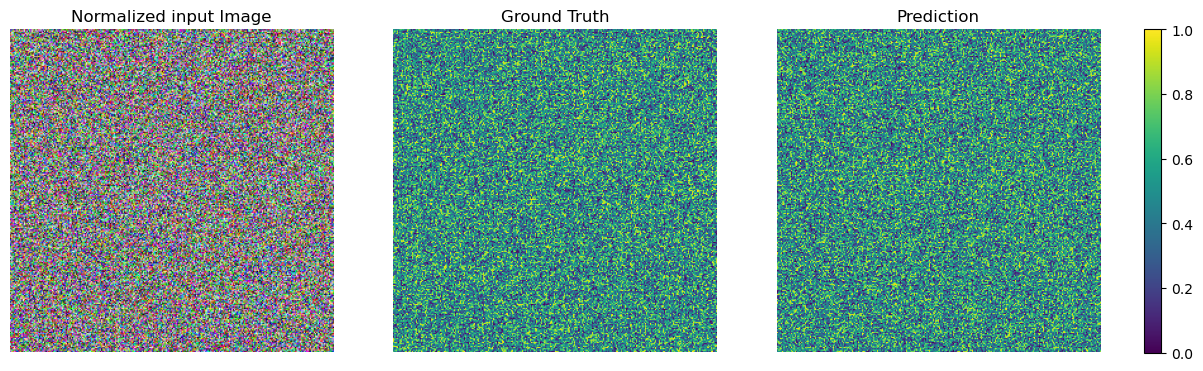

In [44]:
def plot_predictions():
    # visualize predictions
    to_im_shape = lambda x: np.moveaxis(x, 0, -1)
    
    fig, axs = plt.subplots(1, 4, figsize=(12, 3.5), gridspec_kw={'width_ratios': [1, 1, 1, 0.05]})

    # Input image processing: normalize per color channel
    original_image = np.random.rand(3, 256, 256)
    for c in range(original_image.shape[0]):  # Loop over color channels
        channel = original_image[c, :, :]
        channel_min, channel_max = channel.min(), channel.max()
        original_image[c, :, :] = (channel - channel_min) / (channel_max - channel_min)
        
    axs[0].imshow(to_im_shape(original_image))
    axs[0].set_title('Normalized input Image')

    # Ground truth
    y = np.random.rand(1, 256, 256)
    axs[1].imshow(to_im_shape(y), vmin=0, vmax=1)
    axs[1].set_title('Ground Truth')

    # Prediction
    y_pred = np.random.rand(256, 256)
    im = axs[2].imshow(y_pred, vmin=0, vmax=1)
    axs[2].set_title('Prediction')
    

    # Colorbar
    fig.colorbar(im, cax=axs[3])
    
    for ax in axs[:-1]:
        ax.axis('off')

    plt.tight_layout(pad = 0.01)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    plt.show()
    
plot_predictions()

In [34]:
def dice_loss(y_real, y_pred_logits):
    """
    Compute Dice score between ground truth and predictions.

    Args:
        y_real (torch.Tensor): Ground truth binary mask, shape (N, H, W) or (N, 1, H, W)
        y_pred_logits (torch.Tensor): Predicted logits, shape (N, H, W) or (N, 1, H, W)
        threshold (float): Threshold for converting logits to binary mask
        smooth (float): Small constant for numerical stability

    Returns:
        torch.Tensor: Dice score
    """
    # Convert logits to predicted binary mask
    
    threshold = 0.5
    smooth = 1e-6
    
    y_pred = (torch.sigmoid(y_pred_logits) > threshold).float()
    
    # Flatten tensors
    y_real_flat = y_real.view(-1)
    y_pred_flat = y_pred.view(-1)
    
    # Calculate intersection and union
    intersection = (y_real_flat * y_pred_flat).sum()
    union = y_real_flat.sum() + y_pred_flat.sum()
    
    # Compute Dice score
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice


In [56]:
import torch

#torch Nan


dice_loss(torch.tensor([[[1, 0], [1, 0]]]), torch.tensor([[[float('nan'), float('nan')], [float('nan'), float('nan')]]])) # 1.0

tensor(5.0000e-07)

NameError: name 'tensor' is not defined